# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Willyandie Saputra
- **Email:** m243d4ky1426@bangkit.academy
- **ID Dicoding:** willyandie_saputra

## Menentukan Pertanyaan Bisnis

- Berapa banyak yang melakukan peminjaman sepeda perbulan dalam kurun waktu 1 tahun?
- Bagaimana pengaruh cuaca terhadap peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Saya memilih dataset Bike-sharing-dataset file **day.csv**, karena saya ingin melihat data peminjaman sepeda perhari dengan cakupan data yang lebih mudah diakses, dan sesuai dengan kebutuhan analisa saya. Dataset yang lebih besar atau dengan tingkat detail yang lebih tinggi mungkin memerlukan lebih banyak waktu dan sumber daya untuk diproses dan dianalisis. Dengan menggunakan dataset yang telah diagregasi ke tingkat harian, saya dapat mengurangi kompleksitas analisis.

In [68]:
bikes_df = pd.read_csv("./data/day.csv")
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [69]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Saya melihat adanya kesalahan tipe data pada kolo dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data **datetime**, bukan **object**.

In [70]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada bikes_df

In [71]:
bikes_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [72]:
bikes_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [73]:
bikes_df.duplicated().sum()

0

Dari hasil assessing data yang saya dilakukan, tidak ditemukan data **null**, **missing value**, ataupun data yang **duplikat**.

### Cleaning Data

In [74]:
bikes_df["dteday"] = pd.to_datetime(bikes_df["dteday"])

In [75]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Merubah tipe data kolom **dteday** menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [76]:
bikes_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: instant, dtype: int64

Berdasarkan hasil diatas, dapat dilihat bahwa pada bulan ke-2 adalah bulan yang paling sedikit.

In [77]:
bikes_df.groupby(by="season").agg({
    "instant": "nunique",
    "mnth": ["max", "min", "mean", "std"]
})

instant mnth                         
       nunique  max min       mean       std
season                                      
1          181   12   1   3.093923  3.403759
2          184    6   3   4.652174  0.951671
3          188    9   6   7.691489  0.948137
4          178   12   9  10.696629  0.919402

Berdasarkan hasil diatas, dapat dilihat bahwa season ke-4 merupakan season yang paling aktif dalam peminjaman sepeda. Dimana maximal adalah 12 dan minimalnya adalah 9. Dibandingkan season yang lain, season ke-4 merupakan season terbaik.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [78]:
bikes_df['bulan'] = bikes_df['mnth']
bikes_df['tahun'] = bikes_df['yr']

monthly_rentals = bikes_df.groupby(['tahun', 'bulan'])['cnt'].sum().reset_index()

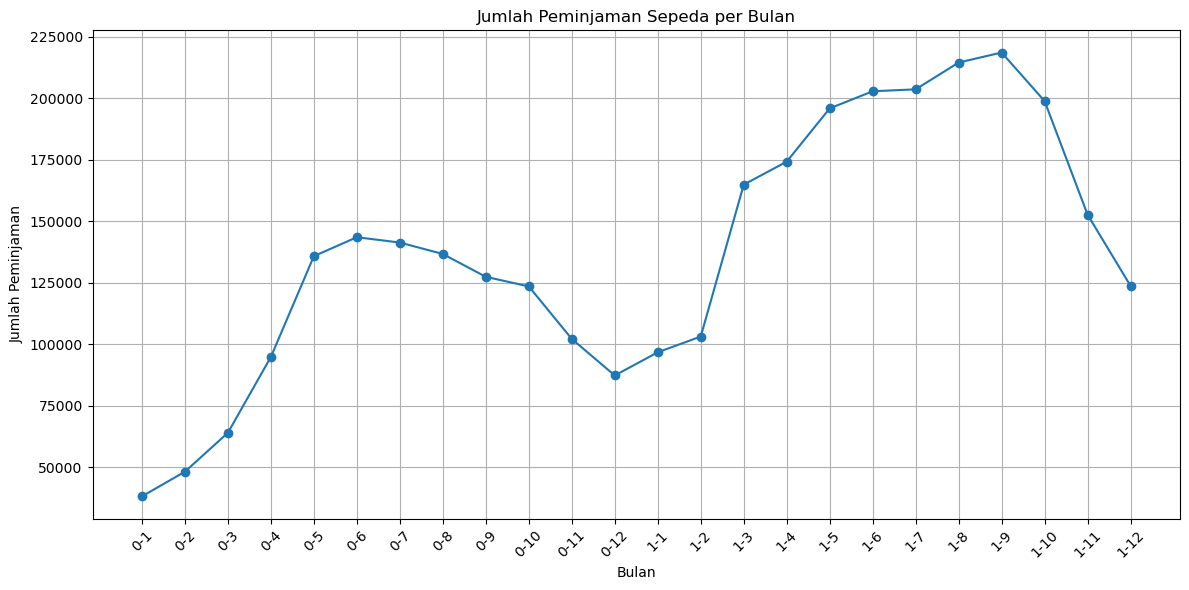

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_rentals['tahun'].astype(str) + '-' + monthly_rentals['bulan'].astype(str), monthly_rentals['cnt'], marker='o', linestyle='-')
plt.title('Jumlah Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Tren umum menunjukkan bahwa jumlah peminjaman sepeda cenderung meningkat dari bulan ke bulan selama beberapa tahun terakhir. Terdapat variasi musiman dalam jumlah peminjaman sepeda, dengan puncak peminjaman terjadi pada bulan-bulan dengan cuaca lebih hangat atau peristiwa khusus seperti musim liburan.

### Pertanyaan 2:

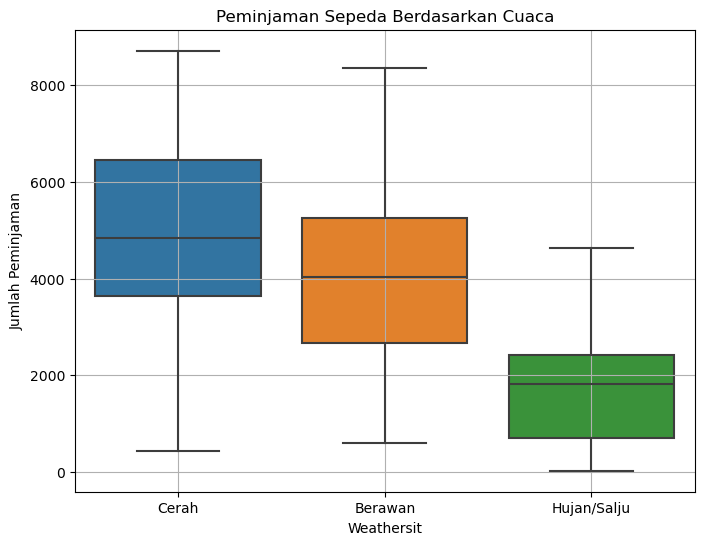

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=bikes_df)
plt.title('Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Weathersit')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2], ['Cerah', 'Berawan', 'Hujan/Salju'])
plt.grid(True)
plt.show()

Jumlah peminjaman sepeda cenderung lebih tinggi pada kondisi cuaca cerah (weathersit = 0) dan berawan (weathersit = 1) dibandingkan dengan kondisi hujan/salju (weathersit = 2). Distribusi jumlah peminjaman sepeda pada kondisi cuaca cerah dan berawan memiliki median yang lebih tinggi dan rentang interkuartil yang lebih besar dibandingkan dengan kondisi hujan/salju. Terdapat beberapa outlier pada kondisi cuaca cerah dan berawan, yang menunjukkan adanya kejadian peminjaman sepeda yang tidak biasa pada kondisi tersebut.

## Conclusion

- Berdasarkan visualisasi ini, saya menyimpulkan bahwa terdapat tren pertumbuhan dalam jumlah peminjaman sepeda selama beberapa tahun terakhir, dengan variasi musiman yang cukup signifikan. Ini dapat menjadi informasi berharga bagi penyedia layanan sewa sepeda untuk merencanakan strategi pemasaran dan operasional mereka.
- Berdasarkan visualisasi ini, saya menyimpulkan bahwa cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda, dengan jumlah peminjaman cenderung lebih tinggi pada kondisi cuaca cerah dan berawan dibandingkan dengan kondisi hujan/salju.

In [81]:
bikes_df.to_csv("main_data.csv", index=False)